In [1]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize, Normalize
from torch.utils.data import DataLoader

In [2]:
transform = Compose(
    [Resize((224,224)),
     ToTensor(),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder("./images", transform=transform)

In [3]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [4]:
print(len(train_dataset))
print(len(test_dataset))

2512
628


In [5]:
batch_size = 16

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [6]:
classes = ('awake', 'tired')

tensor([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])


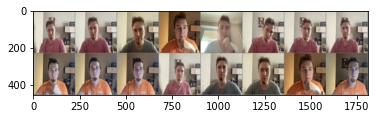

tired


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# функция для показа изображения
def imshow(img):
    img = img  / 2  + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных обучающих изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(labels)

# # показать изображения
imshow(torchvision.utils.make_grid(images))
# показать лейблы изображений
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(1)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size = 5), #220
            nn.ReLU(),
            nn.MaxPool2d(2,2), #110
            
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size = 5), #106
            nn.ReLU(),
            nn.MaxPool2d(2,2), #53
            
            nn.Flatten(),
            nn.Linear(53*53*16, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84,2)
        )
    
    def forward(self, x):
        return self.network(x)

In [9]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5),# 220
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 110

            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),# 106
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 53

            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5),# 49
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 24
            

            nn.Flatten(),
            nn.Linear(in_features=24*24*64,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=2),
        )

    def forward(self, x):
        return self.network(x)

In [10]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5),# 220
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 110
            nn.Dropout2d(0.3),

            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),# 106
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 53
            nn.Dropout2d(0.3),

            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5),# 49
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 24 
            

            nn.Flatten(),
            nn.Dropout2d(0.3),
            nn.Linear(in_features=24*24*64,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=2),
        )

    def forward(self, x):
        return self.network(x)

In [11]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3),# 222
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 111
            nn.Dropout2d(0.3),

            nn.Conv2d(in_channels=64,out_channels=32,kernel_size=3),# 109
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 54
            nn.Dropout2d(0.3),

            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3),# 52
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),# 26
            

            nn.Flatten(),
            nn.Dropout2d(0.3),
            nn.Linear(in_features=26*26*64,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=2),
        )

    def forward(self, x):
        return self.network(x)

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

In [13]:
def train(model, epochs):
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    losses = []
    
    for epoch in range(epochs):  # многократное прохождение по набору данных
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # получаем входные данные; данные - это список [inputs, labels].
            inputs, labels = data

            # обнуляем градиенты параметров
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # вывести статистику обучения
            running_loss += loss.item()
        cur_loss = running_loss / len(train_dataset)
        losses.append(cur_loss)
        
        print(f'[epoch:{epoch + 1}] loss: {cur_loss:.3f}')
        
        running_loss = 0.0

    print('Finished Training')
    return losses

In [14]:
def plot_losses(losses, model):
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Loss No. of epochs, model: {model}');

In [17]:
net1 = Net1()
net1

Net1(
  (network): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=44944, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [24]:
losses1 = train(net1, 7)
PATH = './models/net1.pth'
torch.save(net1.state_dict(), PATH)

[0.041421006984856665]
[epoch:1] loss: 0.041
[0.041421006984856665, 0.025908241367181017]
[epoch:2] loss: 0.026
[0.041421006984856665, 0.025908241367181017, 0.017398050197457174]
[epoch:3] loss: 0.017
[0.041421006984856665, 0.025908241367181017, 0.017398050197457174, 0.013061472032733812]
[epoch:4] loss: 0.013
[0.041421006984856665, 0.025908241367181017, 0.017398050197457174, 0.013061472032733812, 0.011904955714768503]
[epoch:5] loss: 0.012
[0.041421006984856665, 0.025908241367181017, 0.017398050197457174, 0.013061472032733812, 0.011904955714768503, 0.008149549988240261]
[epoch:6] loss: 0.008
[0.041421006984856665, 0.025908241367181017, 0.017398050197457174, 0.013061472032733812, 0.011904955714768503, 0.008149549988240261, 0.006095302314789939]
[epoch:7] loss: 0.006
Finished Training


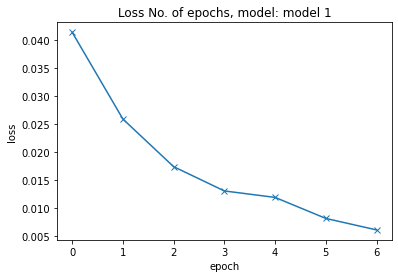

In [29]:
plot_losses(losses1, "model 1")

In [16]:
net2 = Net2()

In [30]:
losses2 = train(net2, 5)
PATH = './models/net2.pth'
torch.save(net2.state_dict(), PATH)

[epoch:1] loss: 0.043
[epoch:2] loss: 0.032
[epoch:3] loss: 0.021
[epoch:4] loss: 0.018
[epoch:5] loss: 0.013
Finished Training


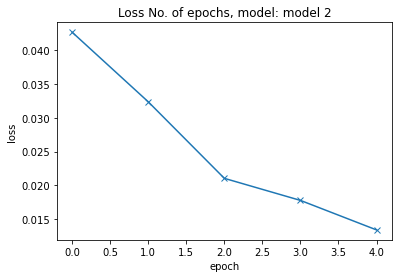

In [31]:
plot_losses(losses2, "model 2")

In [ ]:
net3 = Net3()

In [32]:
losses3 = train(net3, 5)
PATH = './models/net3.pth'
torch.save(net3.state_dict(), PATH)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[epoch:1] loss: 0.042
[epoch:2] loss: 0.033
[epoch:3] loss: 0.025
[epoch:4] loss: 0.021
[epoch:5] loss: 0.016
Finished Training


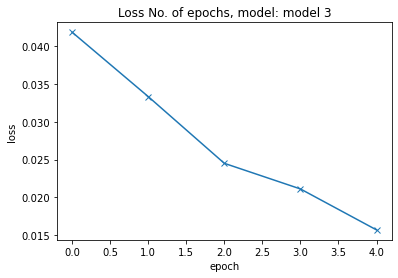

In [33]:
plot_losses(losses3, "model 3")

In [34]:
net4 = Net4()
losses4 = train(net4,5)
PATH = './models/net4.pth'
torch.save(net4.state_dict(), PATH)

[epoch:1] loss: 0.042
[epoch:2] loss: 0.033
[epoch:3] loss: 0.023
[epoch:4] loss: 0.017
[epoch:5] loss: 0.015
Finished Training


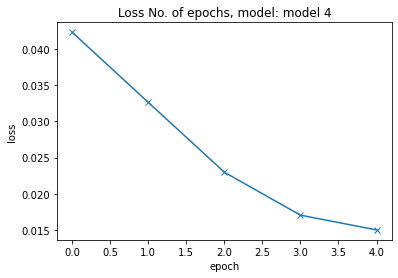

In [35]:
plot_losses(losses4, "model 4")

In [36]:
def show_accuracy(model):
    correct = 0
    total = 0
    # поскольку мы не обучаемся, нам не нужно вычислять градиенты для наших выходов
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # рассчитываем выходные данные, пропуская изображения через сеть
            outputs = model(images)
            # класс с наибольшей мощностью - это то, что мы выбираем в качестве предсказания
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the {len(test_dataset)} test images: {100 * correct // total} %')

In [37]:
show_accuracy(net1)

Accuracy of the network on the 638 test images: 94 %


In [38]:
show_accuracy(net2)

Accuracy of the network on the 638 test images: 92 %


In [39]:
show_accuracy(net3)

Accuracy of the network on the 638 test images: 88 %


In [40]:
show_accuracy(net4)

Accuracy of the network on the 638 test images: 86 %


In [48]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net1(images)
        _, predictions = torch.max(outputs, 1)
        # собираем правильные прогнозы для каждого класса
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Выводим точность на каждом классе
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: awake is 89.6 %
Accuracy for class: tired is 99.7 %


In [49]:
from PIL import Image

img1 = Image.open("images/tired/tired1000.jpg")
img2 = Image.open("images/awake/awake1.jpg")

In [50]:
def custom_predict(img, model):
    prediction = model(img.unsqueeze(0))
    _, preds = torch.max(prediction, dim = 1)
    return dataset.classes[preds[0].item()]

In [51]:
net2.eval()

Net2(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=36864, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=2, bias=True)
  )
)

prediction: tired


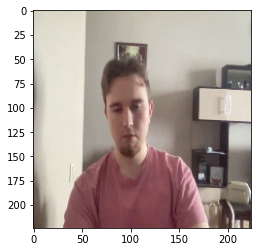

In [52]:
plt.imshow(img1)
img_tired = Compose(
    [Resize((224,224)),
     ToTensor(),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(img1)

print(f"prediction: {custom_predict(img_tired, net2)}")

prediction: awake


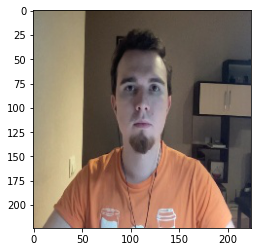

In [53]:
plt.imshow(img2)

img_awake = Compose(
    [Resize((224,224)),
     ToTensor(),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(img2)

print(f"prediction: {custom_predict(img_awake, net2)}")

In [54]:
model1 = Net1()
model1.load_state_dict(torch.load('./models/net1.pth'))
model1.eval()

Net1(
  (network): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=44944, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [55]:
print(f"prediction: {custom_predict(img_tired, model1)}")

prediction: tired


In [56]:
print(f"prediction: {custom_predict(img_awake, model1)}")

prediction: awake
